# EDA: FCB_Dynamic-Pricing

**Objective:** To analyze the synthetic dataset to understand its structure, find key relationships between features, and validate the feature engineering strategy for our pricing models.

### Key Takeaways
* **Price is primarily driven by opponent tier and seating zone**, with VIP seats for A++ matches commanding the highest prices.
* **External "buzz" metrics** like web visits and competitor pricing show a moderate positive correlation with the final ticket price.
* **The data is clean** with no missing values, but features have vastly different scales, justifying the need for normalization.

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
from pathlib import Path

# Add the project root to the Python path to allow importing from 'config'
# This assumes the notebook is in the 'notebooks' directory
project_root = Path.cwd().parent
sys.path.append(str(project_root))

from config import SYNTHETIC_DATA_PATH

# Set plot styles
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 8)

In [54]:
df = pd.read_csv(SYNTHETIC_DATA_PATH)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   match_id                    250 non-null    int64  
 1   zone                        250 non-null    object 
 2   days_until_match            250 non-null    int64  
 3   opponent_tier               250 non-null    object 
 4   weather_forecast            250 non-null    object 
 5   competing_city_events       250 non-null    bool   
 6   flights_to_barcelona_index  250 non-null    int64  
 7   google_trends_index         250 non-null    int64  
 8   internal_search_trends      250 non-null    int64  
 9   web_visits                  250 non-null    int64  
 10  web_conversion_rate         250 non-null    float64
 11  social_media_sentiment      250 non-null    float64
 12  competitor_avg_price        250 non-null    float64
 13  zone_historical_sales       250 non

In [55]:
# Display first few rows
print("First 5 rows of the dataset:")
display(df.head())

# Display summary statistics for numerical columns
print("\nSummary statistics:")
display(df.describe())

First 5 rows of the dataset:


,match_id,zone,days_until_match,opponent_tier,weather_forecast,competing_city_events,flights_to_barcelona_index,google_trends_index,internal_search_trends,web_visits,web_conversion_rate,social_media_sentiment,competitor_avg_price,zone_historical_sales,zone_seats_availability,ticket_price
0,100,Gol Nord,88,A,Rain,False,100,98,1224,29610,0.0533,0.3756,121.87,361,14639,101.10
1,100,Gol Sud,88,A,Rain,False,100,98,1224,29610,0.0533,0.3756,135.19,309,14691,104.75
2,100,Lateral,88,A,Rain,False,100,98,1224,29610,0.0533,0.3756,270.56,581,29419,235.47
3,100,Tribuna,88,A,Rain,False,100,98,1224,29610,0.0533,0.3756,503.77,454,24546,345.56
4,100,VIP,88,A,Rain,False,100,98,1224,29610,0.0533,0.3756,1078.03,99,3901,754.93



Summary statistics:


,match_id,days_until_match,flights_to_barcelona_index,google_trends_index,internal_search_trends,web_visits,web_conversion_rate,social_media_sentiment,competitor_avg_price,zone_historical_sales,zone_seats_availability,ticket_price
count,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000
mean,124.500000,44.920000,94.620000,87.400000,1905.780000,46167.540000,0.047078,0.417976,468.786640,7177.624000,10622.376000,334.405480
std,14.459818,26.337202,10.428356,17.214685,831.697598,24204.624596,0.020430,0.711000,399.214403,6626.147186,7651.490236,267.873973
min,100.000000,2.000000,60.000000,50.000000,649.000000,12424.000000,0.013300,-0.682300,84.170000,99.000000,0.000000,71.710000
25%,112.000000,18.000000,95.000000,76.000000,1200.000000,27644.000000,0.030500,-0.090800,165.577500,2093.000000,3631.250000,121.997500
50%,124.500000,48.500000,100.000000,99.500000,1717.000000,40497.500000,0.045600,0.276250,322.175000,5273.500000,9994.500000,239.655000
75%,137.000000,66.000000,100.000000,100.000000,2444.000000,61269.000000,0.058600,0.907400,665.510000,9467.500000,14678.000000,442.682500
max,149.000000,88.000000,100.000000,100.000000,4370.000000,100000.000000,0.100000,1.939100,1836.490000,30000.000000,29419.000000,1162.010000


### Analysis of the Target Variable: `ticket_price`
Let's look at the distribution of our target variable to understand the range of prices.

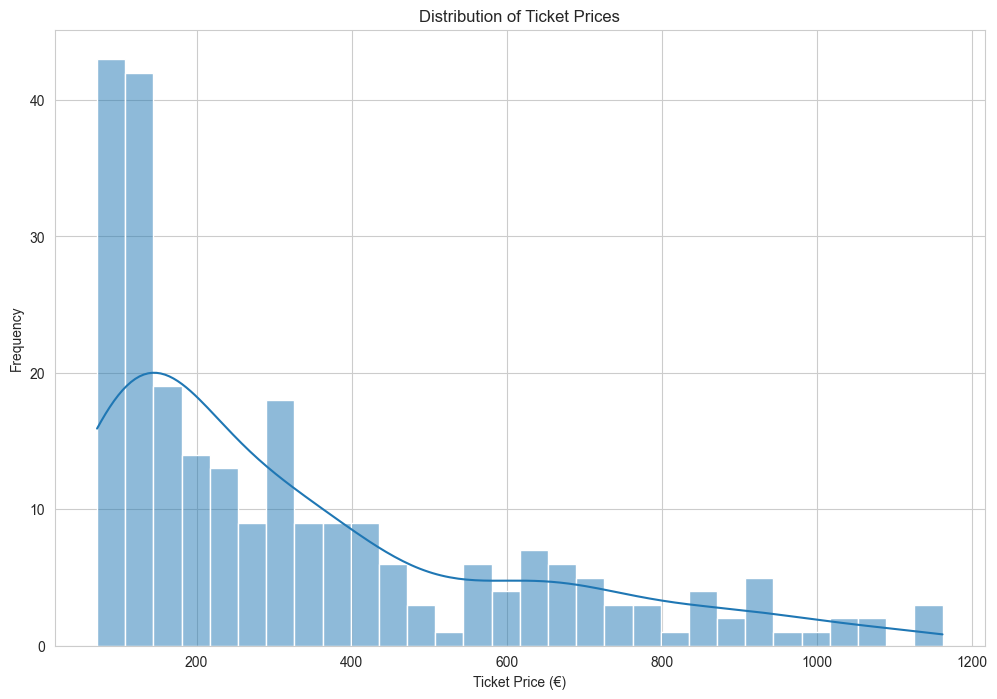

In [56]:
sns.histplot(df['ticket_price'], kde=True, bins=30)
plt.title('Distribution of Ticket Prices')
plt.xlabel('Ticket Price (€)')
plt.ylabel('Frequency')
plt.show()

### How do ticket prices vary by key categories?
We'll use box plots to see the relationship between ticket price and categorical features like `zone` and `opponent_tier`.

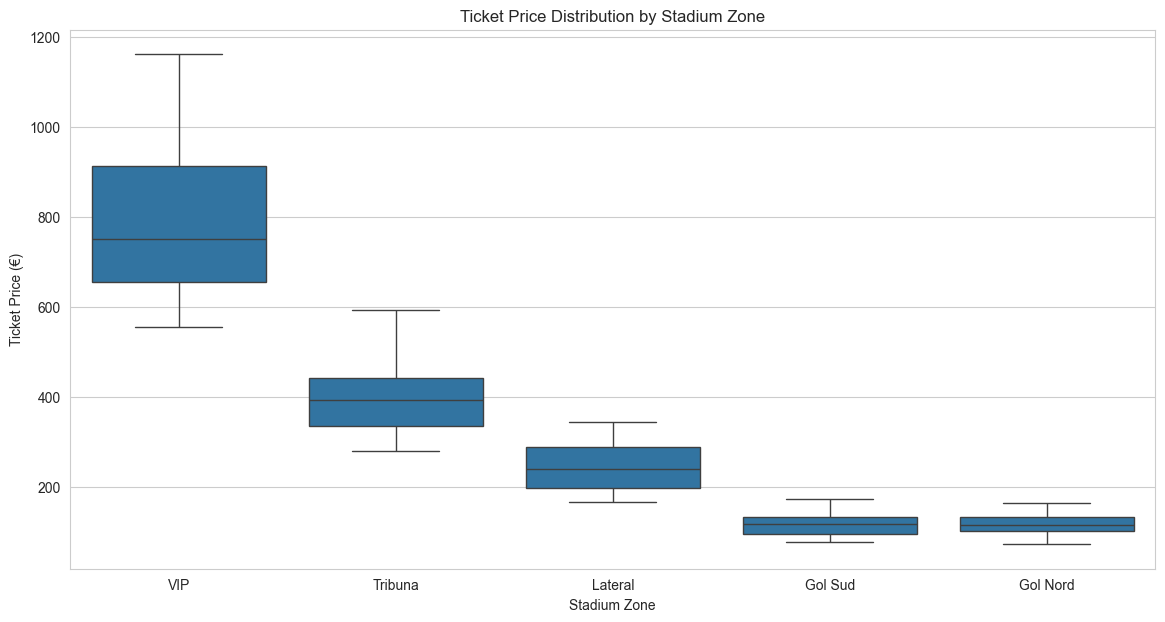

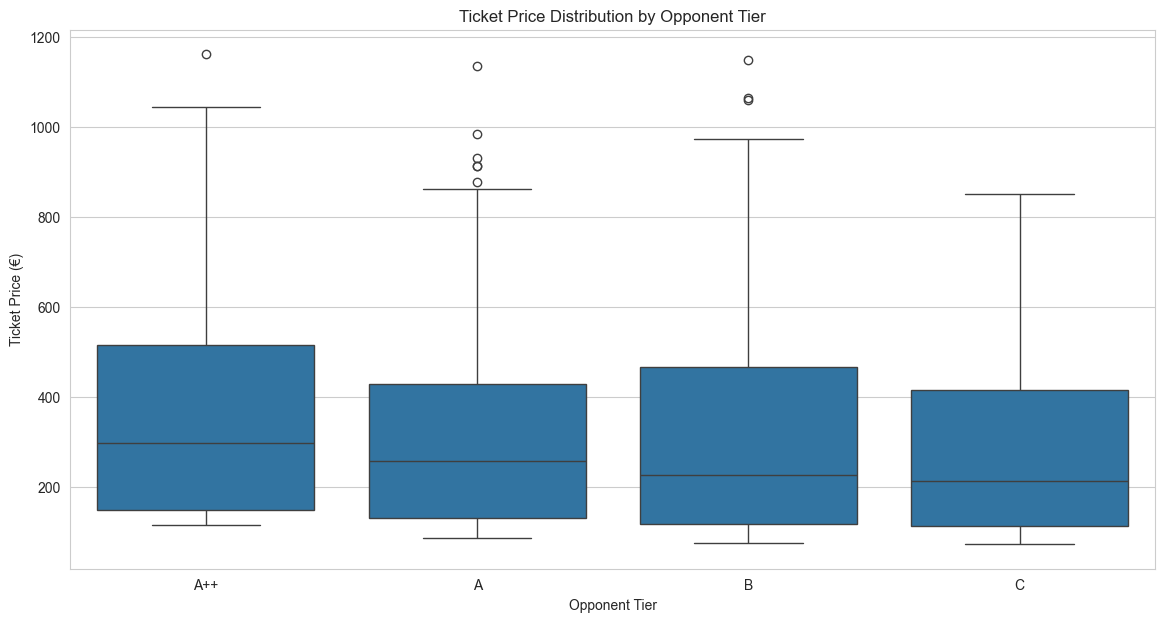

In [57]:
# Price vs. Stadium Zone
plt.figure(figsize=(14, 7))
sns.boxplot(data=df, x='zone', y='ticket_price', order=['VIP', 'Tribuna', 'Lateral', 'Gol Sud', 'Gol Nord'])
plt.title('Ticket Price Distribution by Stadium Zone')
plt.xlabel('Stadium Zone')
plt.ylabel('Ticket Price (€)')
plt.show()

# Price vs. Opponent Tier
plt.figure(figsize=(14, 7))
sns.boxplot(data=df, x='opponent_tier', y='ticket_price', order=['A++', 'A', 'B', 'C'])
plt.title('Ticket Price Distribution by Opponent Tier')
plt.xlabel('Opponent Tier')
plt.ylabel('Ticket Price (€)')
plt.show()

### Correlation Between Numerical Features
A heatmap is a great way to visualize the correlation matrix and see which numerical features are most related to each other and to the ticket price.

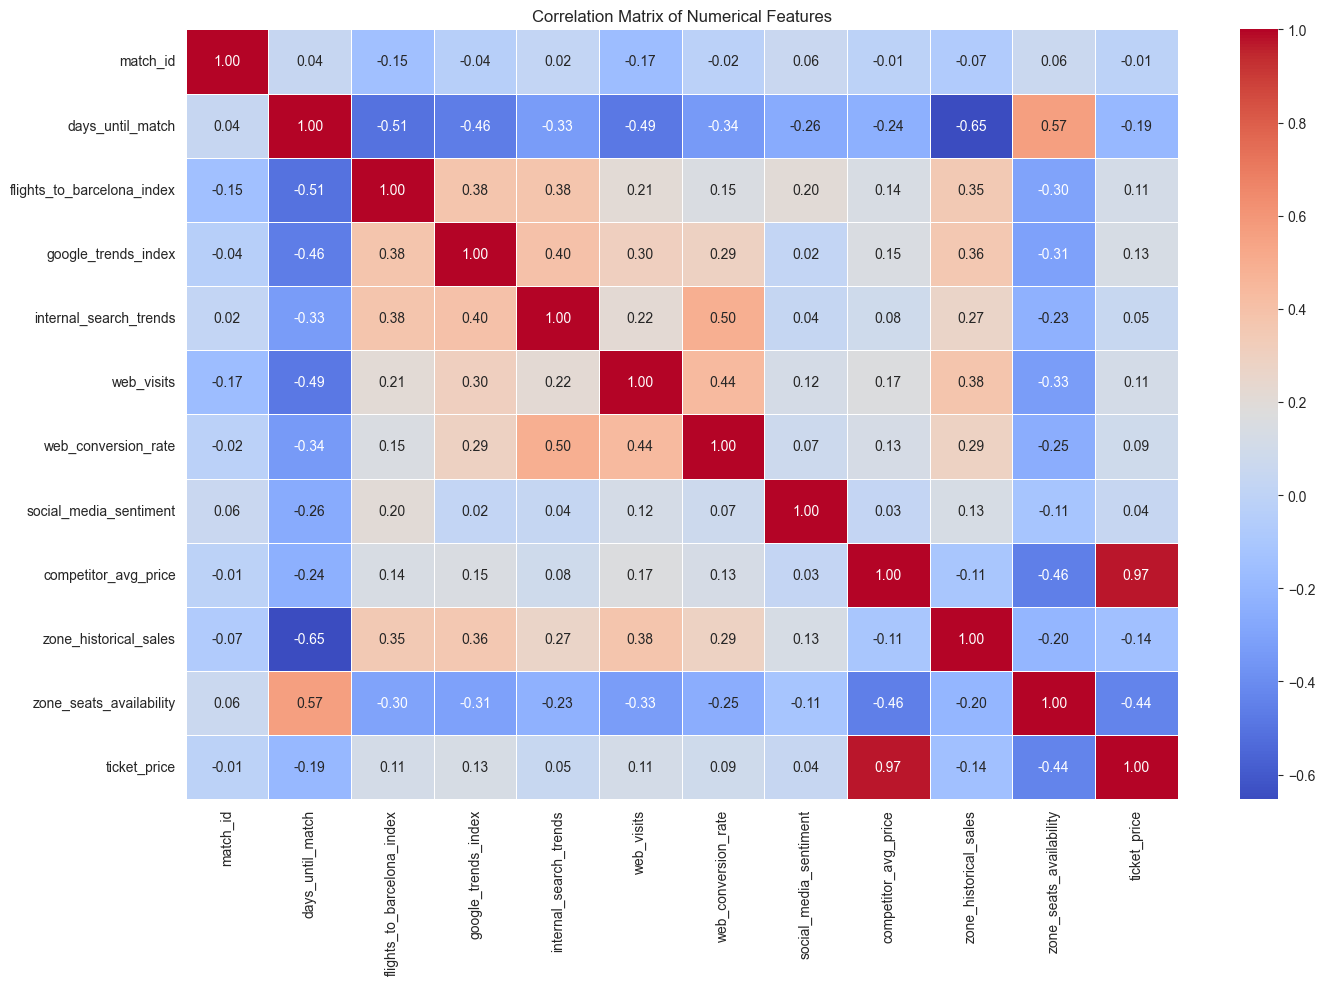

In [58]:
# Select only numerical columns for correlation matrix
numerical_df = df.select_dtypes(include=np.number)

plt.figure(figsize=(16, 10))
sns.heatmap(numerical_df.corr(), annot=True, fmt=".2f", cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

## Summary of Findings

* **Price Drivers**: As expected, `ticket_price` is highly dependent on the `zone` and `opponent_tier`. VIP and Tribuna zones command the highest prices, and A++ opponents drive prices up significantly.
* **Correlations**: `ticket_price` shows a strong positive correlation with `competitor_avg_price` and a moderate positive correlation with external buzz factors like `google_trends_index` and `web_visits`.
* **Time Factor**: There is a negative correlation between `days_until_match` and most "buzz" metrics, which makes sense—excitement builds as the match approaches.

**Next Steps**: This analysis confirms that our feature engineering strategy is sound. The strong categorical relationships justify the use of one-hot encoding, and the varying scales of numerical features justify the need for scaling.